<a href="https://colab.research.google.com/github/vg11072001/Machine-Learning/blob/main/projects/tensorflow_vs_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
 import tensorflow as tf

In [38]:
tf.__version__

'2.9.2'

## Tensorflow

In [39]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our fuction"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        curr_loss, curr_exp, _ = sess.run([loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)

Iteration 0
loss = 12131.874
exp = 3.8558025
Iteration 1
loss = 8606.107
exp = 3.7531424
Iteration 2
loss = 6733.829
exp = 3.6725378
Iteration 3
loss = 5550.338
exp = 3.6058743
Iteration 4
loss = 4727.8125
exp = 3.5488994
Iteration 5
loss = 4120.27
exp = 3.4990807
Iteration 6
loss = 3651.9084
exp = 3.4547784
Iteration 7
loss = 3279.1594
exp = 3.4148664
Iteration 8
loss = 2975.0842
exp = 3.3785357
Iteration 9
loss = 2722.0808
exp = 3.3451848
Iteration 10
loss = 2508.1377
exp = 3.3143537
Iteration 11
loss = 2324.7644
exp = 3.2856822
Iteration 12
loss = 2165.7815
exp = 3.258883
Iteration 13
loss = 2026.5809
exp = 3.233723
Iteration 14
loss = 1903.6539
exp = 3.2100105
Iteration 15
loss = 1794.2814
exp = 3.1875863
Iteration 16
loss = 1696.3214
exp = 3.1663156
Iteration 17
loss = 1608.0618
exp = 3.146084
Iteration 18
loss = 1528.1194
exp = 3.126794
Iteration 19
loss = 1455.364
exp = 3.1083608
Iteration 20
loss = 1388.8608
exp = 3.0907106
Iteration 21
loss = 1327.8326
exp = 3.073779
Iteration

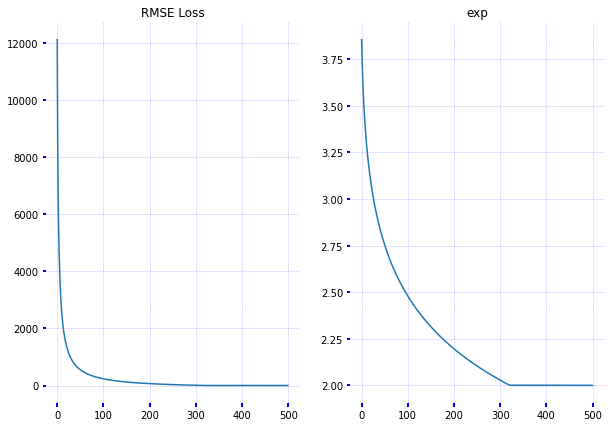

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    
plot_results(loss_history, exp_history)

## Pytorch

In [41]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2).sum()))

def forward(x, e):
    """Forward pass for our function"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-6

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)

# Model parameter and it's true value
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)
y = forward(x, exp)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 200):
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data)
    exp_history.append(y_hat.data[0])
    
    # Compute gradients
    loss.backward()
    
    print("loss = %s" % loss.data)
    print("exp = %s" % exp_hat.data[0])
    
    # Update model parameters
    exp_hat.data -= learning_rate * exp_hat.grad.data
    exp_hat.grad.data.zero_()

Iteration 0
loss = tensor(38984.7461)
exp = tensor(4.)
Iteration 1
loss = tensor(14424.3877)
exp = tensor(3.5612)
Iteration 2
loss = tensor(9864.9355)
exp = tensor(3.3962)
Iteration 3
loss = tensor(7555.2651)
exp = tensor(3.2818)
Iteration 4
loss = tensor(6126.3877)
exp = tensor(3.1931)
Iteration 5
loss = tensor(5145.6675)
exp = tensor(3.1202)
Iteration 6
loss = tensor(4427.1724)
exp = tensor(3.0582)
Iteration 7
loss = tensor(3876.4382)
exp = tensor(3.0042)
Iteration 8
loss = tensor(3439.9695)
exp = tensor(2.9562)
Iteration 9
loss = tensor(3085.0481)
exp = tensor(2.9131)
Iteration 10
loss = tensor(2790.4705)
exp = tensor(2.8739)
Iteration 11
loss = tensor(2541.8606)
exp = tensor(2.8379)
Iteration 12
loss = tensor(2329.1106)
exp = tensor(2.8047)
Iteration 13
loss = tensor(2144.8950)
exp = tensor(2.7738)
Iteration 14
loss = tensor(1983.7719)
exp = tensor(2.7450)
Iteration 15
loss = tensor(1841.6115)
exp = tensor(2.7179)
Iteration 16
loss = tensor(1715.2170)
exp = tensor(2.6925)
Iteration

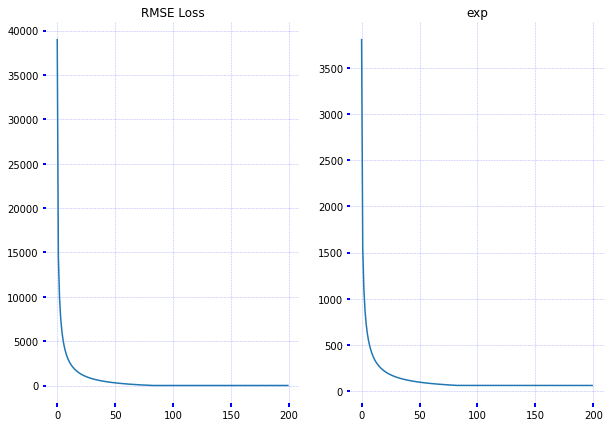

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    
plot_results(loss_history, exp_history)